In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("I:/Project_data/college_project/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

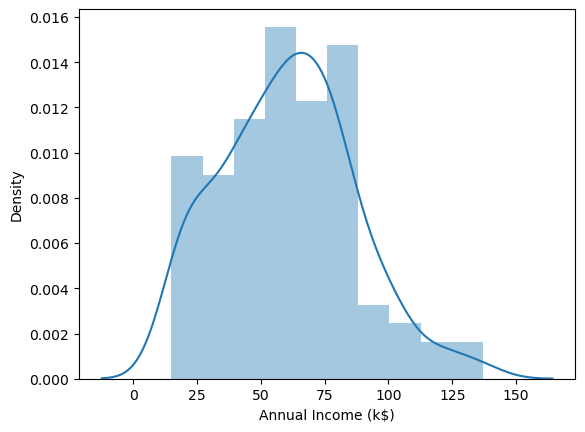

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

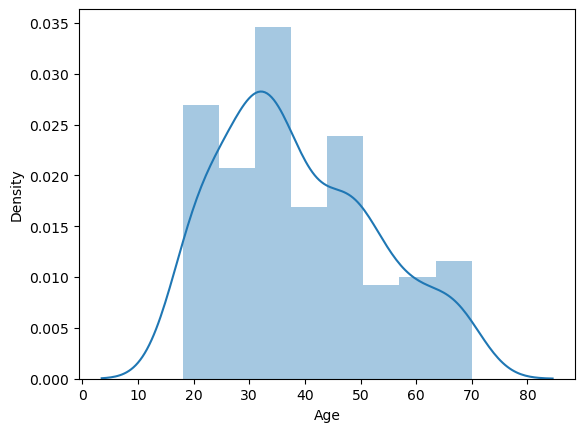

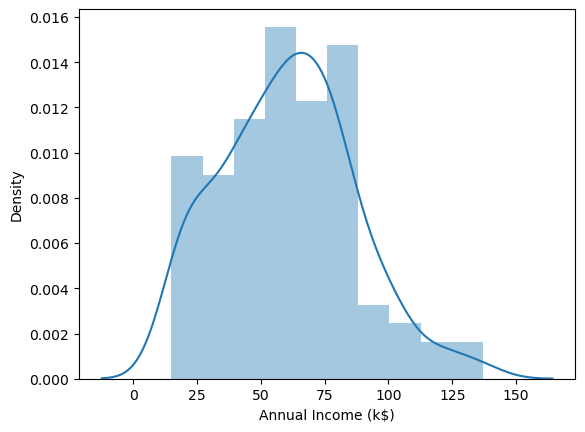

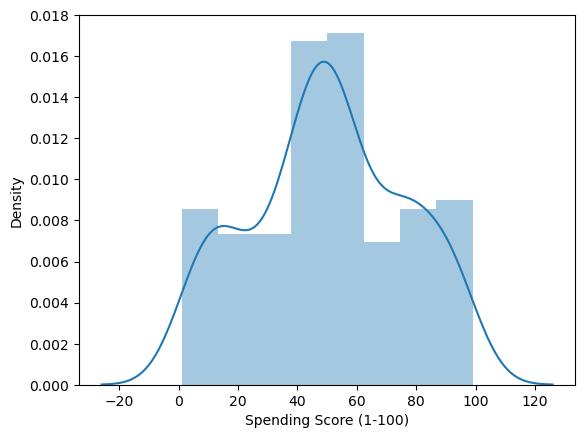

In [7]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

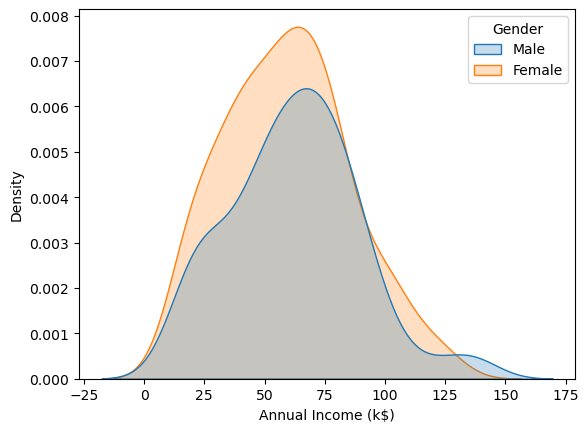

In [8]:
sns.kdeplot(x=df['Annual Income (k$)'],fill=True,hue=df['Gender'])

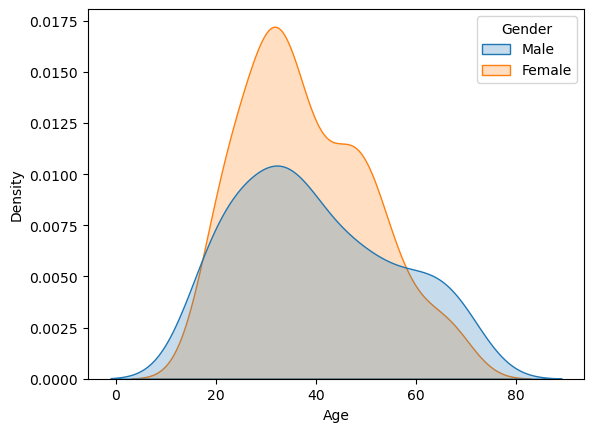

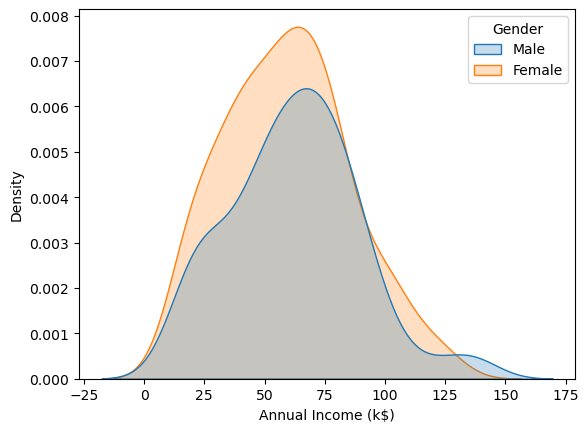

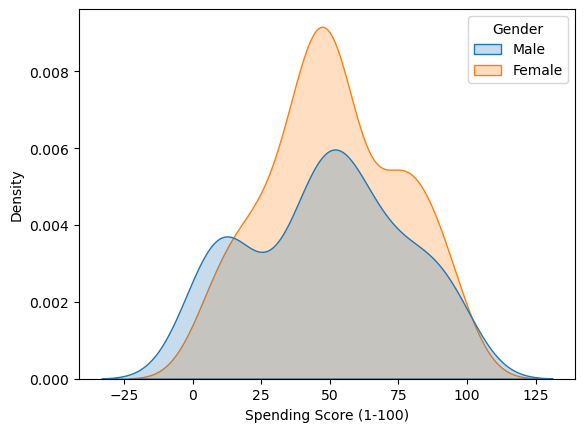

In [9]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i],fill=True,hue=df['Gender'])

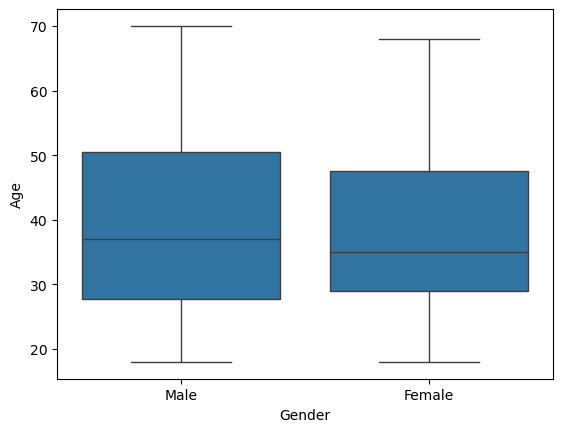

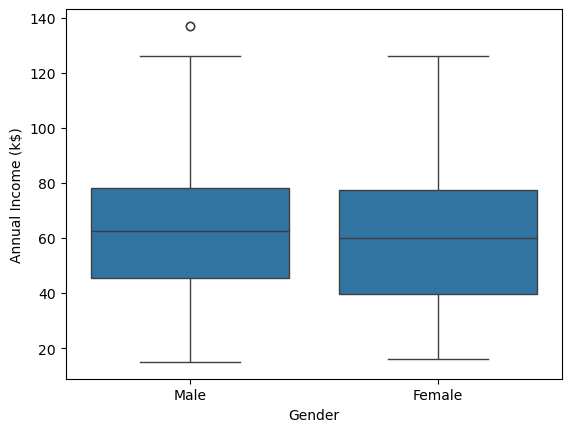

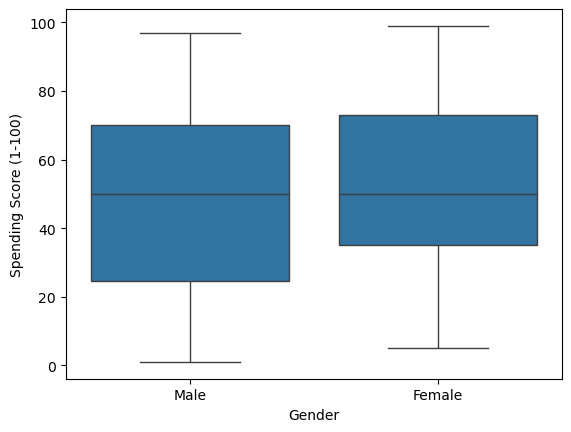

In [10]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)
#tells us more about the shape and how the data is structured.

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

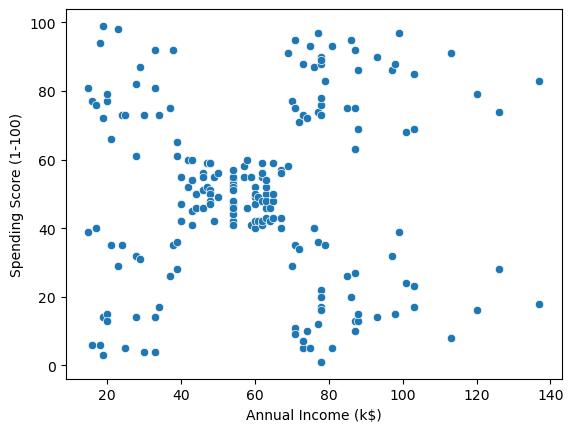

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')
#We can see 5 rough cluster using these two variables.

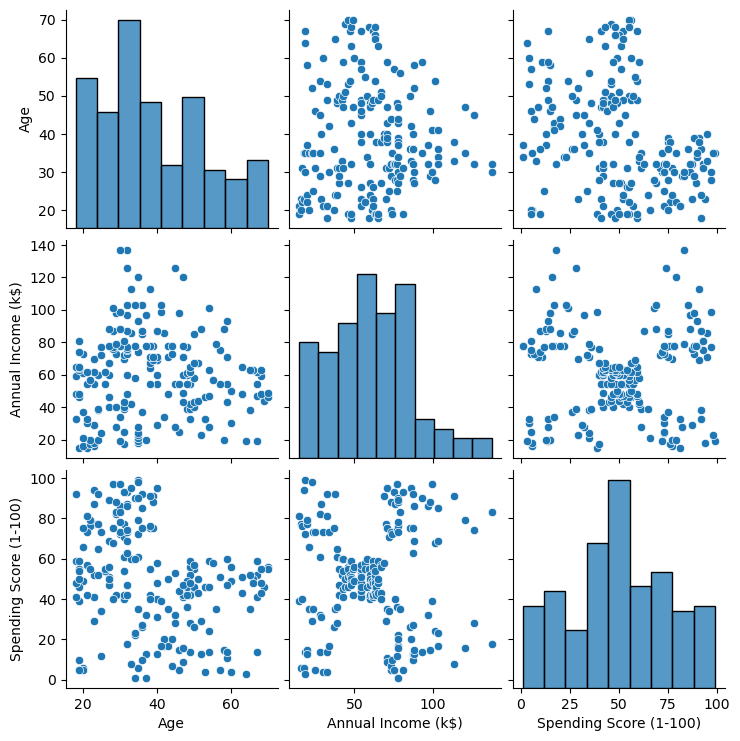

In [13]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)
#we drop csutomerid as it doesnt provide any value in this analysis.

<Axes: >

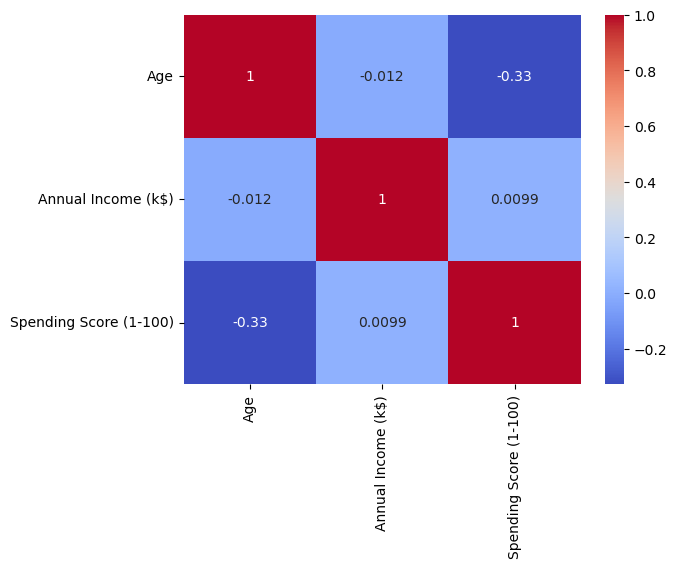

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [15]:
clustering1 = KMeans(n_clusters=3)

In [16]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [19]:
df['Income Cluster'].value_counts()

Income Cluster
2    86
1    58
0    56
Name: count, dtype: int64

In [20]:
clustering1.inertia_

25640.457784396836

In [21]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [22]:
intertia_scores

[137277.28000000003,
 49761.73701298701,
 25640.457784396836,
 13556.829274891776,
 8481.496190476191,
 5081.484660267269,
 4284.702631578947,
 2862.833028083028,
 2507.97277820219,
 1845.6164141414142]

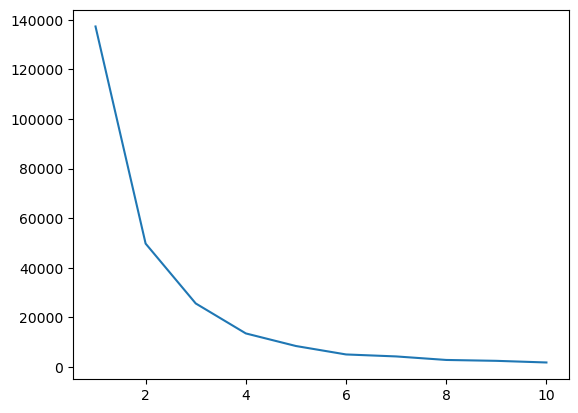

In [23]:
plt.plot(range(1,11),intertia_scores)

In [24]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [25]:
df.groupby('Income Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,37.120690,29.551724,49.689655
2,41.279070,60.906977,50.337209


In [82]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,0,2
196,Female,45,126,28,0,1
197,Male,32,126,74,0,2
198,Male,32,137,18,0,1


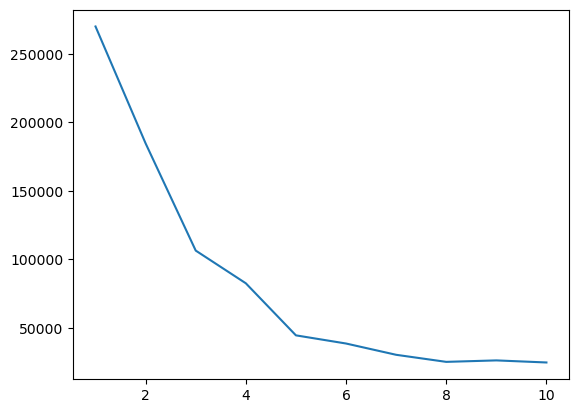

In [84]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

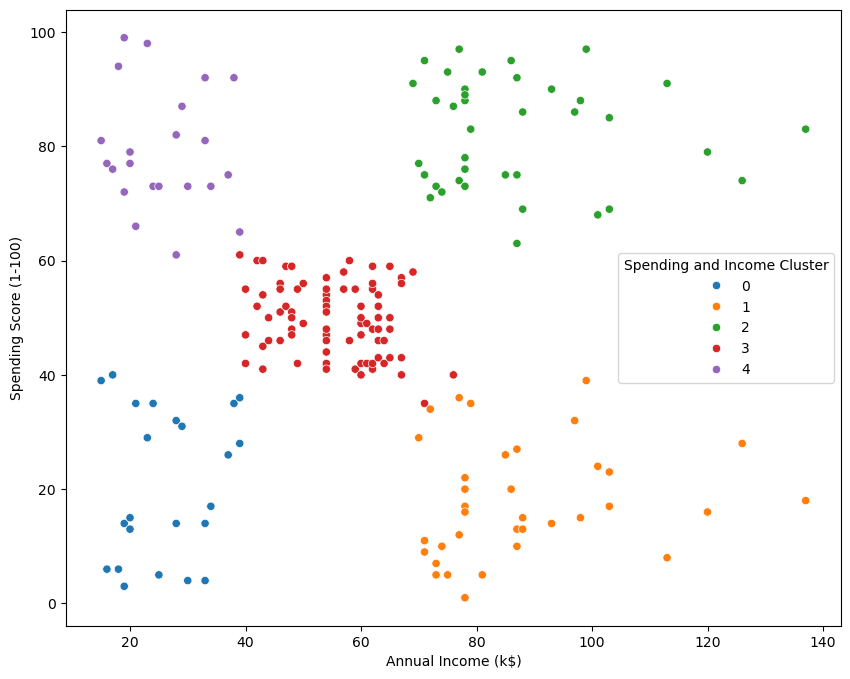

In [85]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df,x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [88]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns =('X','Y')
centers

,X,Y
0,26.304348,20.913043
1,87.750000,17.583333
2,86.538462,82.128205
3,55.087500,49.712500
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

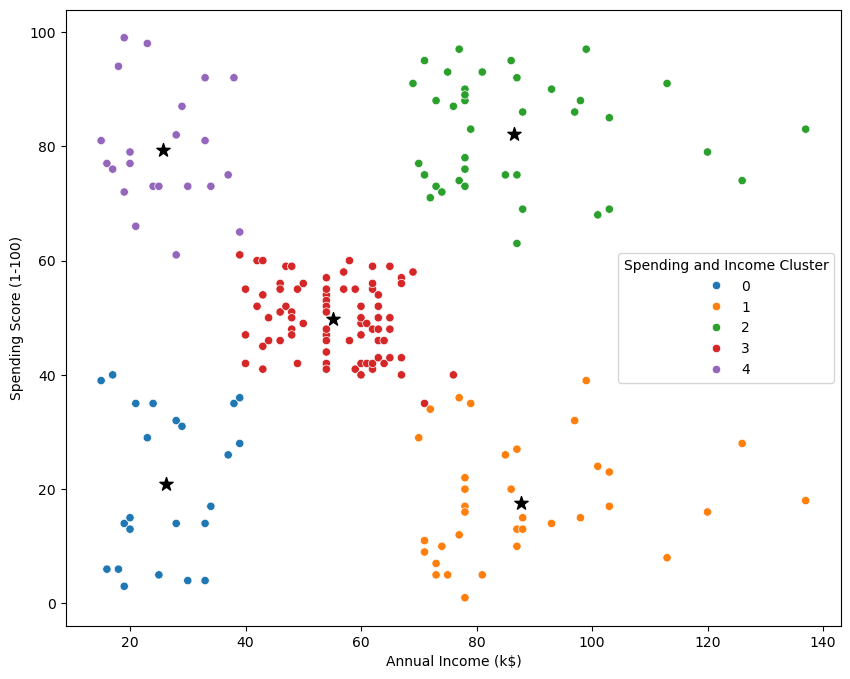

In [90]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['X'],y=centers['Y'],s=100,c='black',marker='*')
sns.scatterplot(data = df,x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [92]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.472222,0.527778
2,0.538462,0.461538
3,0.587500,0.412500
4,0.590909,0.409091


In [94]:
df.groupby('Spending and Income Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,42.937500,55.087500,49.712500
4,25.272727,25.727273,79.363636


In [96]:
from sklearn.preprocessing import StandardScaler

In [98]:
scale = StandardScaler()

In [100]:
df.head

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0      Male   19                  15                      39               1   
1      Male   21                  15                      81               1   
2    Female   20                  16                       6               1   
3    Female   23                  16                      77               1   
4    Female   31                  17                      40               1   
..      ...  ...                 ...                     ...             ...   
195  Female   35                 120                      79               0   
196  Female   45                 126                      28               0   
197    Male   32                 126                      74               0   
198    Male   32                 137                      18               0   
199    Male   30                 137                      83               0   

     Spen

In [102]:
dff = pd.get_dummies(df,drop_first=True)
dff.head

<bound method NDFrame.head of      Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0     19                  15                      39               1   
1     21                  15                      81               1   
2     20                  16                       6               1   
3     23                  16                      77               1   
4     31                  17                      40               1   
..   ...                 ...                     ...             ...   
195   35                 120                      79               0   
196   45                 126                      28               0   
197   32                 126                      74               0   
198   32                 137                      18               0   
199   30                 137                      83               0   

     Spending and Income Cluster  Gender_Male  
0                              0         True  
1        

In [104]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [106]:
dff=dff[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff.head

<bound method NDFrame.head of      Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0     19                  15                      39         True
1     21                  15                      81         True
2     20                  16                       6        False
3     23                  16                      77        False
4     31                  17                      40        False
..   ...                 ...                     ...          ...
195   35                 120                      79        False
196   45                 126                      28        False
197   32                 126                      74         True
198   32                 137                      18         True
199   30                 137                      83         True

[200 rows x 4 columns]>

In [108]:
dff = pd.DataFrame(scale.fit_transform(dff))

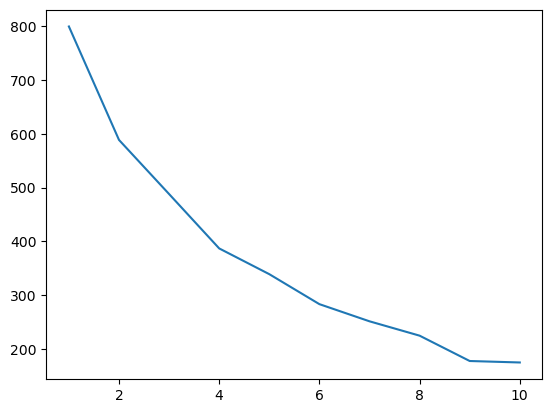

In [110]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)